In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import sys
from pandas.plotting import scatter_matrix

In [2]:
# Load the dataset and display the first 10 rows to inspect the data structure
df = pd.read_csv('pokemon.csv')
df.head(n = 10)

,id,user_id,QoA_VLCresolution,QoA_VLCbitrate,QoA_VLCframerate,QoA_VLCdropped,QoA_VLCaudiorate,QoA_VLCaudioloss,QoA_BUFFERINGcount,QoA_BUFFERINGtime,...,QoD_os-version,QoD_api-level,QoU_sex,QoU_age,QoU_Ustedy,QoF_begin,QoF_shift,QoF_audio,QoF_video,MOS
0,590,71,360,528.39294,24.950000,0,43.800000,0,2,683,...,4.1.1(122573.16),16,1,20,5,3,5,3,4,3
1,428,46,360,402.64664,30.066667,0,44.200000,0,2,690,...,4.4.2(I9195XXUCNK1),19,1,25,5,4,5,5,5,5
2,406,44,360,735.84070,24.200000,0,44.183333,0,2,840,...,4.1.2(I9300XXELL4),16,1,22,5,3,5,4,4,4
3,1256,133,240,529.48830,24.116667,9,43.850000,0,2,868,...,4.4.4(suv3Rw),19,1,31,5,4,5,5,5,5
4,244,22,360,736.00085,24.066667,0,43.850000,0,2,869,...,4.1.2(I9300XXELL4),16,0,26,5,5,5,4,5,5
5,179,13,360,528.58900,24.800000,1,43.800000,0,2,873,...,4.4.2(I9195XXUCNK1),19,1,29,5,5,5,4,5,4
6,464,52,360,658.07920,24.733333,0,43.800000,0,2,876,...,4.4.2(G900FXXU1ANG2),19,1,26,5,4,5,5,5,5
7,273,26,360,565.17450,25.050000,0,44.483333,0,2,887,...,4.4.2(I9195XXUCNK1),19,1,33,5,3,5,5,4,4
8,395,42,360,567.29980,24.700000,0,43.783333,0,2,890,...,4.1.1(122573.16),16,1,26,5,2,5,4,4,3
9,363,38,360,217.11320,30.000000,0,43.966667,0,2,912,...,4.4.2(I9195XXUCNK1),19,0,19,5,4,5,4,5,4


In [3]:
# Display a summary of the DataFrame, including data types and non-null values for all columns
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1543 non-null   int64  
 1   user_id             1543 non-null   int64  
 2   QoA_VLCresolution   1543 non-null   int64  
 3   QoA_VLCbitrate      1543 non-null   float64
 4   QoA_VLCframerate    1543 non-null   float64
 5   QoA_VLCdropped      1543 non-null   int64  
 6   QoA_VLCaudiorate    1543 non-null   float64
 7   QoA_VLCaudioloss    1543 non-null   int64  
 8   QoA_BUFFERINGcount  1543 non-null   int64  
 9   QoA_BUFFERINGtime   1543 non-null   int64  
 10  QoS_type            1543 non-null   int64  
 11  QoS_operator        1543 non-null   int64  
 12  QoD_model           1543 non-null   object 
 13  QoD_os-version      1543 non-null   object 
 14  QoD_api-level       1543 non-null   int64  
 15  QoU_sex             1543 non-null   int64  
 16  QoU_ag

In [4]:
# Generate descriptive statistics (count, mean, std, min, max, quartiles) for all numerical columns
df.describe()

,id,user_id,QoA_VLCresolution,QoA_VLCbitrate,QoA_VLCframerate,QoA_VLCdropped,QoA_VLCaudiorate,QoA_VLCaudioloss,QoA_BUFFERINGcount,QoA_BUFFERINGtime,...,QoS_operator,QoD_api-level,QoU_sex,QoU_age,QoU_Ustedy,QoF_begin,QoF_shift,QoF_audio,QoF_video,MOS
count,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,...,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000
mean,924.261180,98.128321,354.566429,520.522257,25.001576,1.217758,40.379790,0.235256,1.392093,6164.184705,...,3.051199,18.560596,0.855476,29.179520,4.882048,3.533377,4.523655,3.738820,3.884640,3.702528
std,525.492253,50.668531,25.939930,350.957926,6.690082,5.618366,9.123582,1.133616,0.895943,15032.225559,...,0.975363,1.642513,0.351734,8.006615,0.471312,1.025622,0.953146,1.006382,0.887098,1.056283
min,52.000000,1.000000,16.000000,0.003294,0.000000,0.000000,0.000000,0.000000,1.000000,683.000000,...,1.000000,15.000000,0.000000,14.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,472.500000,53.000000,360.000000,307.668850,24.733333,0.000000,43.783333,0.000000,1.000000,2010.500000,...,3.000000,19.000000,1.000000,25.000000,5.000000,3.000000,4.000000,3.000000,4.000000,3.000000
50%,897.000000,117.000000,360.000000,474.000920,25.316667,0.000000,44.150000,0.000000,1.000000,2719.000000,...,3.000000,19.000000,1.000000,27.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000
75%,1298.500000,135.000000,360.000000,661.491925,29.800000,1.000000,44.466667,0.000000,2.000000,4067.000000,...,4.000000,19.000000,1.000000,30.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000
max,2077.000000,181.000000,360.000000,3918.293500,31.316667,107.000000,46.000000,14.000000,10.000000,329271.000000,...,4.000000,22.000000,1.000000,55.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
df['QoA_VLCresolution'].unique()


array([360, 240,  16], dtype=int64)

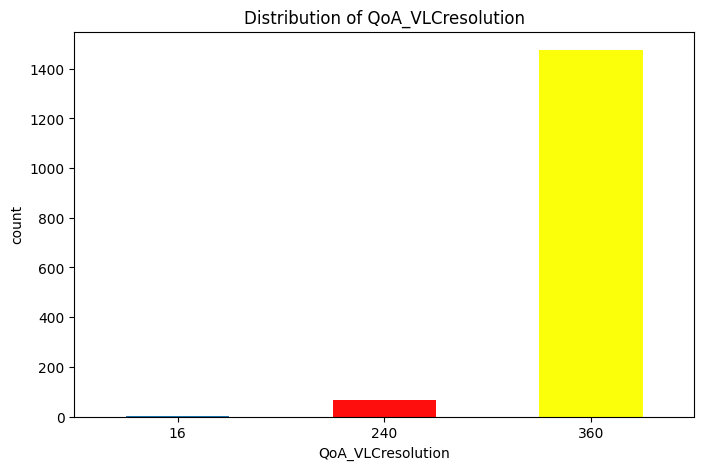

In [ ]:
resolution_counts = df['QoA_VLCresolution'].value_counts().sort_index()
plt.figure(figsize = (8, 5))
resolution_counts.plot(kind = 'bar', color = ['#1f77b4', "#ff0e0e", "#fbff09"])
plt.title('Distribution of QoA_VLCresolution')
plt.xlabel('QoA_VLCresolution')
plt.ylabel('count')
#Rotate X-axis labels to be horizontal for better readability
plt.xticks(rotation=0)
plt.show()

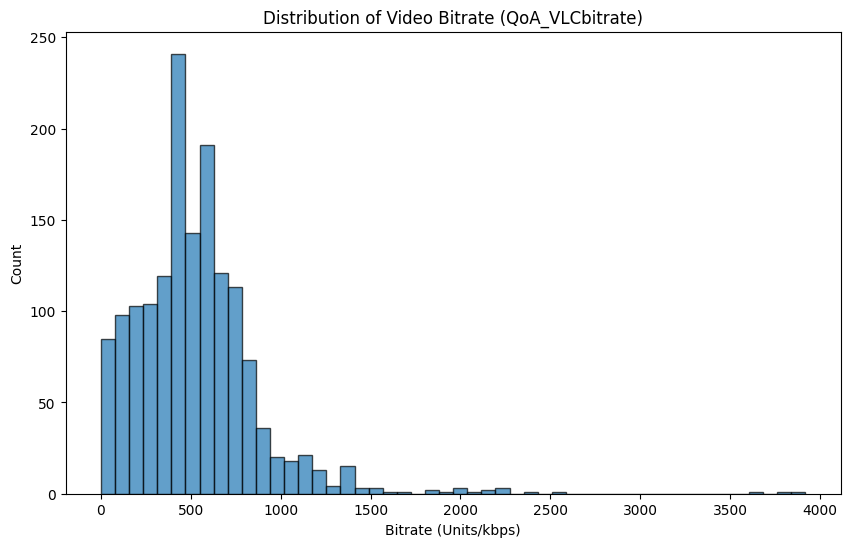

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['QoA_VLCbitrate'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Video Bitrate (QoA_VLCbitrate)')
plt.xlabel('Bitrate (Units/kbps)')
plt.ylabel('Count')
plt.show()

In [8]:
# Calculate and print the main descriptive statistics
df['QoA_VLCframerate'].describe()

count    1543.000000
mean       25.001576
std         6.690082
min         0.000000
25%        24.733333
50%        25.316667
75%        29.800000
max        31.316667
Name: QoA_VLCframerate, dtype: float64

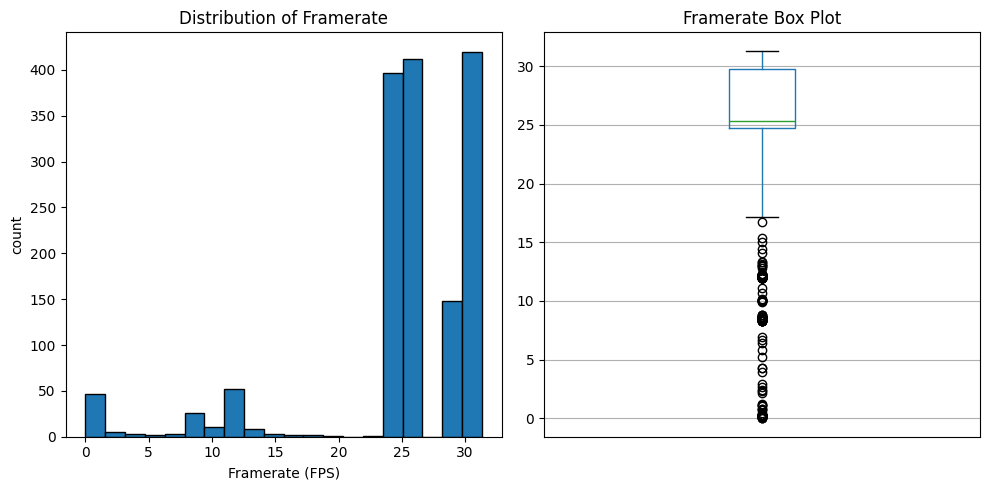

In [9]:
plt.figure(figsize = (10, 5))
# Histogram to see where the data clusters
plt.subplot(1, 2, 1)
plt.hist(df['QoA_VLCframerate'], bins = 20, edgecolor = 'black')
plt.title('Distribution of Framerate')
plt.xlabel('Framerate (FPS)')
plt.ylabel('count')
# Box Plot to clearly identify outliers (very low or high values)
plt.subplot(1, 2, 2)
df.boxplot(column = ['QoA_VLCframerate'])
plt.title('Framerate Box Plot')
plt.xticks([])
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

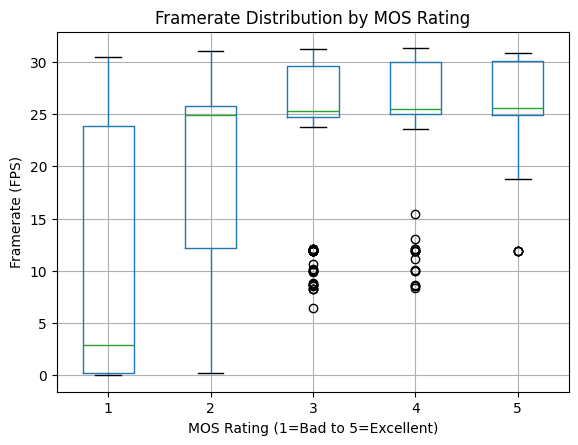

In [10]:
# Box plot: How does the framerate distribute across each MOS rating?
plt.figure(figsize=(8, 6))
df.boxplot(column=['QoA_VLCframerate'], by='MOS')
plt.title('Framerate Distribution by MOS Rating')
plt.suptitle('') # Suppress automatic suptitle
plt.xlabel('MOS Rating (1=Bad to 5=Excellent)')
plt.ylabel('Framerate (FPS)')
plt.show()

In [11]:
df['QoA_BUFFERINGcount'].unique()

array([ 2,  1,  3,  4,  5,  6,  7,  8, 10], dtype=int64)

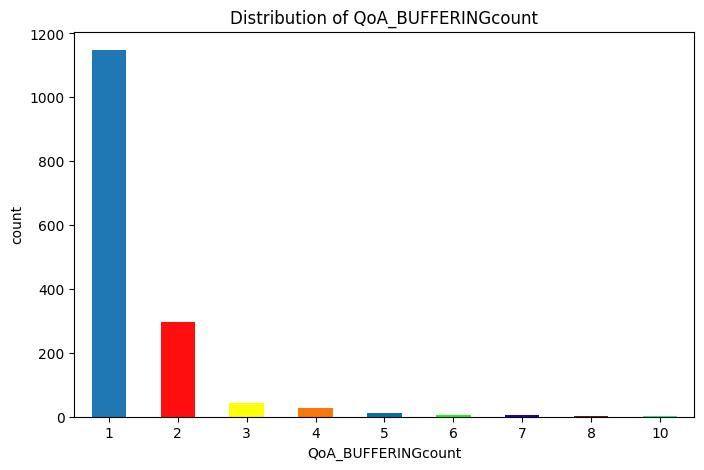

In [12]:
buffering_counts = df['QoA_BUFFERINGcount'].value_counts().sort_index()
plt.figure(figsize = (8, 5))
buffering_counts.plot(kind = 'bar', color = ['#1f77b4', "#ff0e0e", "#fbff09", '#fb7709', "#046fad", 
                                             "#11ff09", "#2600af", "#751717", "#09ffa1", "#531b1b"])
plt.title('Distribution of QoA_BUFFERINGcount')
plt.xlabel('QoA_BUFFERINGcount')
plt.ylabel('count')
#Rotate X-axis labels to be horizontal for better readability
plt.xticks(rotation=0)
plt.show()

In [13]:
df['MOS'].describe()

count    1543.000000
mean        3.702528
std         1.056283
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: MOS, dtype: float64

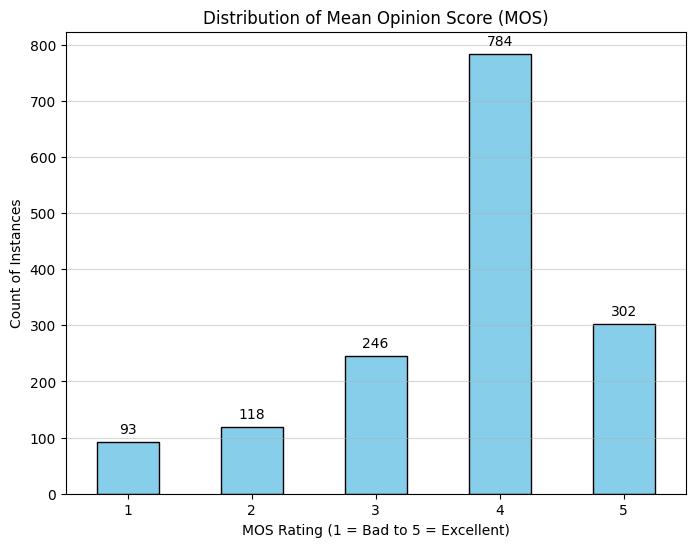

In [14]:
plt.figure(figsize=(8, 6))

# Calculate value counts and plot them as a bar chart
mos_counts = df['MOS'].value_counts().sort_index(ascending=True)
mos_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Labeling
plt.title('Distribution of Mean Opinion Score (MOS)')
plt.xlabel('MOS Rating (1 = Bad to 5 = Excellent)')
plt.ylabel('Count of Instances')
plt.xticks(rotation=0) # Keep x-axis labels horizontal

# Add count labels on top of the bars for clarity
for i, count in enumerate(mos_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.grid(axis='y', alpha=0.5)
plt.show() 

In [15]:
# 1. Apply One-Hot Encoding to the QoA_VLCresolution column
df_encoded_resolution = pd.get_dummies(
    df,
    columns = ['QoA_VLCresolution'],
    prefix = 'resolution',
    drop_first = False,
    dtype = int
)
df_encoded_resolution.head()


,id,user_id,QoA_VLCbitrate,QoA_VLCframerate,QoA_VLCdropped,QoA_VLCaudiorate,QoA_VLCaudioloss,QoA_BUFFERINGcount,QoA_BUFFERINGtime,QoS_type,...,QoU_age,QoU_Ustedy,QoF_begin,QoF_shift,QoF_audio,QoF_video,MOS,resolution_16,resolution_240,resolution_360
0,590,71,528.39294,24.950000,0,43.800000,0,2,683,4,...,20,5,3,5,3,4,3,0,0,1
1,428,46,402.64664,30.066667,0,44.200000,0,2,690,5,...,25,5,4,5,5,5,5,0,0,1
2,406,44,735.84070,24.200000,0,44.183333,0,2,840,2,...,22,5,3,5,4,4,4,0,0,1
3,1256,133,529.48830,24.116667,9,43.850000,0,2,868,2,...,31,5,4,5,5,5,5,0,1,0
4,244,22,736.00085,24.066667,0,43.850000,0,2,869,4,...,26,5,5,5,4,5,5,0,0,1


In [16]:
# Update the main DataFrame 'df'
df = df_encoded_resolution

In [17]:
qos_type_map = {
    1: 'EDGE',
    2: 'UMTS',
    3: 'HSPA',
    4: 'HSPAP',
    5: 'LTE'
}
# 2. Create a temporary column with the descriptive network names
df['QoS_network_name'] = df['QoS_type'].map(qos_type_map)

# 3. Apply One-Hot Encoding to the temporary string column
# The new columns will be named like 'network_type_LTE', 'network_type_UMTS', etc.
df_encoded_type = pd.get_dummies(
    df, 
    columns=['QoS_network_name'], 
    prefix='network_type',
    drop_first=False,
    dtype=int  # Ensures the output dummy variables are explicitly 0 and 1
)
df_encoded_type.head()

,id,user_id,QoA_VLCbitrate,QoA_VLCframerate,QoA_VLCdropped,QoA_VLCaudiorate,QoA_VLCaudioloss,QoA_BUFFERINGcount,QoA_BUFFERINGtime,QoS_type,...,QoF_video,MOS,resolution_16,resolution_240,resolution_360,network_type_EDGE,network_type_HSPA,network_type_HSPAP,network_type_LTE,network_type_UMTS
0,590,71,528.39294,24.950000,0,43.800000,0,2,683,4,...,4,3,0,0,1,0,0,1,0,0
1,428,46,402.64664,30.066667,0,44.200000,0,2,690,5,...,5,5,0,0,1,0,0,0,1,0
2,406,44,735.84070,24.200000,0,44.183333,0,2,840,2,...,4,4,0,0,1,0,0,0,0,1
3,1256,133,529.48830,24.116667,9,43.850000,0,2,868,2,...,5,5,0,1,0,0,0,0,0,1
4,244,22,736.00085,24.066667,0,43.850000,0,2,869,4,...,5,5,0,0,1,0,0,1,0,0


In [18]:
# Update the main DataFrame 'df'
df = df_encoded_type

In [19]:
df_encoded_model = pd.get_dummies(
    df, 
    columns=['QoD_model'], 
    prefix='model',
    drop_first=False,
    dtype=int  # Ensures the output dummy variables are explicitly 0 and 1
)
df_encoded_model.head()

,id,user_id,QoA_VLCbitrate,QoA_VLCframerate,QoA_VLCdropped,QoA_VLCaudiorate,QoA_VLCaudioloss,QoA_BUFFERINGcount,QoA_BUFFERINGtime,QoS_type,...,model_GT-I9192,model_GT-I9193,model_GT-I9194,model_GT-I9195,model_GT-I9300,model_HTC One X+,model_HTC One_M8,model_Nexus 4,model_SM-G900F,model_SM-N9005
0,590,71,528.39294,24.950000,0,43.800000,0,2,683,4,...,0,0,0,0,0,1,0,0,0,0
1,428,46,402.64664,30.066667,0,44.200000,0,2,690,5,...,0,0,0,1,0,0,0,0,0,0
2,406,44,735.84070,24.200000,0,44.183333,0,2,840,2,...,0,0,0,0,1,0,0,0,0,0
3,1256,133,529.48830,24.116667,9,43.850000,0,2,868,2,...,0,0,0,0,0,0,0,0,0,0
4,244,22,736.00085,24.066667,0,43.850000,0,2,869,4,...,0,0,0,0,1,0,0,0,0,0


In [20]:
# Update the main DataFrame 'df'
df = df_encoded_model

In [21]:
df['QoD_os-version'].unique()

array(['4.1.1(122573.16)', '4.4.2(I9195XXUCNK1)', '4.1.2(I9300XXELL4)',
       '4.4.4(suv3Rw)', '4.4.2(G900FXXU1ANG2)', '4.0.4(20130118.175432)',
       '4.4.2(G900FXXU1ANJ1)', '4.4.2(I9195XXUCNK4)', '5.0.1(457188.4)',
       '5.0.1(1602158)', '4.3(I9300XXUGNB5)', '5.0(G900FXXU1BOC7)',
       '4.3(I9506XXUBML5)', '5.1.1(456c49d1b2)', '5.0(G900FXXU1BOC2)',
       '4.4.2(N9005XXUGNI4)', '5.1.1(478106bf5f)', '4.4.2(G900FXXU1ANG9)'],
      dtype=object)

In [22]:
df['QoD_os-version'].value_counts()

QoD_os-version
4.4.4(suv3Rw)             577
4.4.2(I9195XXUCNK1)       278
4.1.1(122573.16)          159
4.1.2(I9300XXELL4)        123
4.4.2(G900FXXU1ANG2)       67
4.4.2(I9195XXUCNK4)        61
4.0.4(20130118.175432)     55
5.0.1(1602158)             44
4.4.2(N9005XXUGNI4)        37
5.1.1(456c49d1b2)          36
5.0(G900FXXU1BOC2)         31
5.0.1(457188.4)            24
4.3(I9300XXUGNB5)          18
5.1.1(478106bf5f)          11
5.0(G900FXXU1BOC7)         10
4.3(I9506XXUBML5)           8
4.4.2(G900FXXU1ANJ1)        3
4.4.2(G900FXXU1ANG9)        1
Name: count, dtype: int64

In [23]:
total_rows = len(df)
# Set the threshold: 1% of the total number of rows (1543 * 0.01 = 15.43)
# We will use 16 instances as the threshold.
threshold = total_rows * 0.01 

# 1. Calculate the frequency of each OS version
os_counts = df['QoD_os-version'].value_counts()

# 2. Identify versions whose count is less than the threshold
low_freq_versions = os_counts[os_counts < threshold].index

# 3. Create a new, grouped column
# Replace low-frequency versions with the label 'Other'
df['QoD_os-version_grouped'] = df['QoD_os-version'].replace(low_freq_versions, 'Other')

# 4. Verify the grouping
print("--- Value Counts for Grouped OS Version (Threshold < 16) ---")
df['QoD_os-version_grouped'].value_counts()


--- Value Counts for Grouped OS Version (Threshold < 16) ---


QoD_os-version_grouped
4.4.4(suv3Rw)             577
4.4.2(I9195XXUCNK1)       278
4.1.1(122573.16)          159
4.1.2(I9300XXELL4)        123
4.4.2(G900FXXU1ANG2)       67
4.4.2(I9195XXUCNK4)        61
4.0.4(20130118.175432)     55
5.0.1(1602158)             44
4.4.2(N9005XXUGNI4)        37
5.1.1(456c49d1b2)          36
Other                      33
5.0(G900FXXU1BOC2)         31
5.0.1(457188.4)            24
4.3(I9300XXUGNB5)          18
Name: count, dtype: int64

In [24]:
# 5. Apply One-Hot Encoding to the new grouped column
df_encoded_os_grouped = pd.get_dummies(
    df, 
    columns=['QoD_os-version_grouped'], 
    prefix='os_group',
    drop_first=False,
    dtype=int 
)

# 6. Drop the original 'QoD_os-version' column (it's now redundant)
df_preprocessed = df_encoded_os_grouped.drop(columns=['QoD_os-version'], errors='ignore')

# 7. Print the final verification steps
print("\n--- DataFrame Head after OHE for Grouped OS Version ---")
df_preprocessed.filter(like='os_group_').head()


--- DataFrame Head after OHE for Grouped OS Version ---


,os_group_4.0.4(20130118.175432),os_group_4.1.1(122573.16),os_group_4.1.2(I9300XXELL4),os_group_4.3(I9300XXUGNB5),os_group_4.4.2(G900FXXU1ANG2),os_group_4.4.2(I9195XXUCNK1),os_group_4.4.2(I9195XXUCNK4),os_group_4.4.2(N9005XXUGNI4),os_group_4.4.4(suv3Rw),os_group_5.0(G900FXXU1BOC2),os_group_5.0.1(1602158),os_group_5.0.1(457188.4),os_group_5.1.1(456c49d1b2),os_group_Other
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [25]:
# Update the main DataFrame 'df' for subsequent steps
df = df_preprocessed

In [26]:
total_rows = len(df)
# Set the threshold: 1% of the total number of rows (adjust as necessary)
threshold = total_rows * 0.01 

# 1. Calculate the frequency of each API level
api_counts = df['QoD_api-level'].value_counts()

# 2. Identify levels whose count is less than the threshold
low_freq_apis = api_counts[api_counts < threshold].index

# 3. Create a new, grouped column
# Replace low-frequency APIs with the label 'Other'
df['QoD_api-level_grouped'] = df['QoD_api-level'].replace(low_freq_apis, 'Other')

# 4. Verify the grouping
print("--- Value Counts for Grouped API Level ---")
df['QoD_api-level_grouped'].value_counts()

--- Value Counts for Grouped API Level ---


QoD_api-level_grouped
19    1028
16     280
22      88
21      68
15      53
18      26
Name: count, dtype: int64

In [27]:
# 5. Apply One-Hot Encoding to the new grouped column
df_encoded_api_grouped = pd.get_dummies(
    df, 
    columns=['QoD_api-level_grouped'], 
    prefix='api_group',
    drop_first=False,
    dtype=int 
)

# 6. Drop the original 'QoD_api-level' column (it's now redundant)
df_preprocessed = df_encoded_api_grouped.drop(columns=['QoD_api-level'], errors='ignore')

# 7. Print the final verification steps
print("\n--- DataFrame Head after OHE for Grouped API Level ---")
df_preprocessed.filter(like='api_group_').head()


--- DataFrame Head after OHE for Grouped API Level ---


,api_group_15,api_group_16,api_group_18,api_group_19,api_group_21,api_group_22
0,0,1,0,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,1,0,0,0,0


In [28]:
# Update the main DataFrame 'df'
df = df_preprocessed

In [29]:
df.describe()

,id,user_id,QoA_VLCbitrate,QoA_VLCframerate,QoA_VLCdropped,QoA_VLCaudiorate,QoA_VLCaudioloss,QoA_BUFFERINGcount,QoA_BUFFERINGtime,QoS_type,...,os_group_5.0.1(1602158),os_group_5.0.1(457188.4),os_group_5.1.1(456c49d1b2),os_group_Other,api_group_15,api_group_16,api_group_18,api_group_19,api_group_21,api_group_22
count,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,...,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000
mean,924.261180,98.128321,520.522257,25.001576,1.217758,40.379790,0.235256,1.392093,6164.184705,3.690214,...,0.028516,0.015554,0.023331,0.021387,0.034349,0.181465,0.016850,0.666235,0.044070,0.057032
std,525.492253,50.668531,350.957926,6.690082,5.618366,9.123582,1.133616,0.895943,15032.225559,1.204165,...,0.166495,0.123783,0.151002,0.144717,0.182182,0.385528,0.128752,0.471710,0.205317,0.231978
min,52.000000,1.000000,0.003294,0.000000,0.000000,0.000000,0.000000,1.000000,683.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.500000,53.000000,307.668850,24.733333,0.000000,43.783333,0.000000,1.000000,2010.500000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,897.000000,117.000000,474.000920,25.316667,0.000000,44.150000,0.000000,1.000000,2719.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1298.500000,135.000000,661.491925,29.800000,1.000000,44.466667,0.000000,2.000000,4067.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2077.000000,181.000000,3918.293500,31.316667,107.000000,46.000000,14.000000,10.000000,329271.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 62 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               1543 non-null   int64  
 1   user_id                          1543 non-null   int64  
 2   QoA_VLCbitrate                   1543 non-null   float64
 3   QoA_VLCframerate                 1543 non-null   float64
 4   QoA_VLCdropped                   1543 non-null   int64  
 5   QoA_VLCaudiorate                 1543 non-null   float64
 6   QoA_VLCaudioloss                 1543 non-null   int64  
 7   QoA_BUFFERINGcount               1543 non-null   int64  
 8   QoA_BUFFERINGtime                1543 non-null   int64  
 9   QoS_type                         1543 non-null   int64  
 10  QoS_operator                     1543 non-null   int64  
 11  QoU_sex                          1543 non-null   int64  
 12  QoU_age             

In [31]:
import seaborn as sns
# 1. Calculate correlation of all features with the MOS
mos_correlations = df.corr()['MOS'].sort_values(ascending=False)

print("--- Correlation of All Features with MOS ---")
print(mos_correlations.head(15)) # Top 15 positive (and MOS itself)
print("\n--- Bottom 15 Negative Correlations with MOS ---")
print(mos_correlations.tail(15))

--- Correlation of All Features with MOS ---
MOS                       1.000000
QoF_audio                 0.840735
QoF_video                 0.689358
QoF_shift                 0.634058
QoF_begin                 0.591324
QoA_VLCframerate          0.544164
QoA_VLCaudiorate          0.353631
QoS_type                  0.146741
api_group_19              0.145515
model_D5803               0.109564
os_group_4.4.4(suv3Rw)    0.107366
network_type_HSPAP        0.098042
QoA_VLCbitrate            0.089671
QoU_sex                   0.062251
QoU_Ustedy                0.055831
Name: MOS, dtype: float64

--- Bottom 15 Negative Correlations with MOS ---
network_type_UMTS                 -0.032672
QoU_age                           -0.039230
model_D5802                       -0.041059
network_type_HSPA                 -0.091903
api_group_16                      -0.107825
model_HTC One X+                  -0.118508
os_group_4.1.1(122573.16)         -0.118508
api_group_15                      -0.128848
mo

In [32]:

# --- Create a mock DataFrame for demonstration ---
# In your real use case, you will already have 'df' loaded from your data.
# This code block is just so the example can run.
try:
    # Check if 'df' exists. If not, create a mock one.
    type(df) 
    print("Using existing 'df' DataFrame.")
except NameError:
    print("Creating a mock 'df' DataFrame for demonstration.")
    # Create a mock dataframe with more features to simulate your data
    num_features = 60
    num_samples = 100
    data = pd.DataFrame(
        data=np.random.rand(num_samples, num_features),
        columns=[f'feature_{i}' for i in range(num_features)]
    )
    # Create a mock MOS column
    data['MOS'] = data['feature_0'] * 0.6 - data['feature_10'] * 0.4 + np.random.rand(num_samples) * 0.5
    # Add some of the specific column names from your heatmap for realism
    data['QoE_operators'] = np.random.rand(num_samples)
    data['QoE_BUFFERINGtime'] = data['feature_10'] * 0.9 + np.random.rand(num_samples) * 0.2
    data['model_SM-G900F'] = np.random.rand(num_samples)
    data['os_group_4.4.2(19355190)'] = np.random.rand(num_samples)
    df = data
    print("Mock 'df' created.")
# --- End of mock data section ---


# 1. Calculate correlation of all features with the MOS
# We assume 'MOS' is your target variable
if 'MOS' in df.columns:
    mos_correlations = df.corr()['MOS'].sort_values(ascending=False)

    print("--- Correlation of All Features with MOS ---")
    # Print top and bottom 15 as in your example
    print("--- Top 15 Positive Correlations ---")
    print(mos_correlations.head(16)) # 16 to include MOS + 15 features
    print("\n--- Bottom 15 Negative Correlations ---")
    print(mos_correlations.tail(15))
    
    # 2. Prepare data for plotting
    # Drop the self-correlation (MOS vs MOS) as it's always 1.0 and skews the plot
    mos_correlations_features = mos_correlations.drop('MOS', errors='ignore')

    # 3. Create the bar chart
    # Set a figure size (width, height). 
    # We need a large height to fit all the feature names.
    # You may need to adjust (14, 20) based on your number of features.
    plt.figure(figsize=(14, 20)) 
    
    # Create the horizontal bar plot
    # A horizontal plot is essential for reading many feature names
    barplot = sns.barplot(
        x=mos_correlations_features.values, 
        y=mos_correlations_features.index,
        palette='coolwarm' # Use 'coolwarm' to match your heatmap
    )
    
    # Add a vertical line at 0 for reference
    plt.axvline(x=0, color='black', linewidth=0.8, linestyle='--')

    # Add labels and title
    plt.title('Feature Correlation with Target Variable (MOS)', fontsize=18)
    plt.xlabel('Correlation Coefficient', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    
    # Add gridlines for easier reading
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    
    # Ensure all labels are visible
    plt.tight_layout()
    
    # Save the plot
    plt.savefig('mos_feature_correlation_barplot.png', dpi=300) # Save with high resolution
    plt.close()

    print("\n--- Bar Chart Generated ---")
    print("The bar chart 'mos_feature_correlation_barplot.png' has been saved.")

else:
    print("Error: 'MOS' column not found in the DataFrame.")
    print("Please ensure your DataFrame 'df' is loaded and has a 'MOS' column.")

Using existing 'df' DataFrame.
--- Correlation of All Features with MOS ---
--- Top 15 Positive Correlations ---
MOS                       1.000000
QoF_audio                 0.840735
QoF_video                 0.689358
QoF_shift                 0.634058
QoF_begin                 0.591324
QoA_VLCframerate          0.544164
QoA_VLCaudiorate          0.353631
QoS_type                  0.146741
api_group_19              0.145515
model_D5803               0.109564
os_group_4.4.4(suv3Rw)    0.107366
network_type_HSPAP        0.098042
QoA_VLCbitrate            0.089671
QoU_sex                   0.062251
QoU_Ustedy                0.055831
QoS_operator              0.048154
Name: MOS, dtype: float64

--- Bottom 15 Negative Correlations ---
network_type_UMTS                 -0.032672
QoU_age                           -0.039230
model_D5802                       -0.041059
network_type_HSPA                 -0.091903
api_group_16                      -0.107825
model_HTC One X+                  -0.118

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13036\59245965.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(



--- Bar Chart Generated ---
The bar chart 'mos_feature_correlation_barplot.png' has been saved.


In [33]:

# 2. Prepare data for the heatmap
# Drop high-variance columns (id/user_id) if they are still present
df_heatmap = df.drop(columns=['id', 'user_id'], errors='ignore')

# Identify OHE columns that might be nearly zero everywhere (low-frequency groups)
# Example: Drop OHE columns where the mean (proportion of 1s) is very low (e.g., < 0.01)
# NOTE: We can't run this without the actual data, so we'll run the full heatmap first.
correlation_matrix = df_heatmap.corr()

# 3. Plot the heatmap (set annot=True to show numbers)
# WARNING: This will be very cluttered and likely unreadable for a large matrix.
plt.figure(figsize=(24, 20)) 
sns.heatmap(
    correlation_matrix,
    annot=True,     # <-- THIS IS THE CHANGE to show numbers
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Full Correlation Matrix Heatmap of Preprocessed Features and MOS', fontsize=18)
plt.tight_layout()
plt.savefig('full_correlation_heatmap_with_annotations.png')
plt.close()

print("\n--- Heatmap Generated ---")
print("The full correlation heatmap ('full_correlation_heatmap_with_annotations.png') has been generated.")


--- Heatmap Generated ---
The full correlation heatmap ('full_correlation_heatmap_with_annotations.png') has been generated.


In [34]:

# We assume 'correlation_matrix' is already calculated from your previous code
# correlation_matrix = df_heatmap.corr()

# Define your correlation threshold
HIGH_CORR_THRESHOLD = 0.8 

# Create a copy of the matrix to avoid modifying the original
corr_matrix_upper = correlation_matrix.copy()

# Mask the lower triangle (including the diagonal) so we don't get duplicates
# k=1 means we exclude the diagonal (self-correlation of 1.0)
corr_matrix_upper = corr_matrix_upper.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Stack the upper triangle into a list of pairs and drop nulls
highly_correlated_pairs = corr_matrix_upper.stack()

# Filter the list to find pairs above our threshold
highly_correlated_pairs = highly_correlated_pairs[abs(highly_correlated_pairs) > HIGH_CORR_THRESHOLD]

print(f"--- Features with High Multicollinearity (Threshold > {HIGH_CORR_THRESHOLD}) ---")
if highly_correlated_pairs.empty:
    print("No highly correlated feature pairs found.")
else:
    print(highly_correlated_pairs)

# To get a simple list of features to consider dropping:
features_to_drop_set = set()
for (feat1, feat2) in highly_correlated_pairs.index:
    # This is a simple (though not perfect) way to decide
    # We add the "second" feature in the pair to a set to drop
    features_to_drop_set.add(feat2)

print("\n--- Suggested List of Redundant Features to Drop ---")
print(list(features_to_drop_set))

--- Features with High Multicollinearity (Threshold > 0.8) ---
QoS_type                         network_type_UMTS                 -0.829220
QoF_audio                        MOS                                0.840735
resolution_240                   resolution_360                    -0.992284
model_ARCHOS 101G9               os_group_4.0.4(20130118.175432)    1.000000
                                 api_group_15                       0.980991
model_D5803                      os_group_4.4.4(suv3Rw)             0.998616
model_GT-I9195                   os_group_4.4.2(I9195XXUCNK1)       0.885141
model_GT-I9300                   os_group_4.1.2(I9300XXELL4)        0.807342
model_HTC One X+                 os_group_4.1.1(122573.16)          1.000000
model_HTC One_M8                 os_group_5.0.1(457188.4)           1.000000
model_Nexus 4                    os_group_5.0.1(1602158)            0.891139
model_SM-N9005                   os_group_4.4.2(N9005XXUGNI4)       1.000000
os_group_4.0.

In [35]:
# We assume 'mos_correlations' is already calculated from your previous code
# mos_correlations = df.corr()['MOS'].sort_values(ascending=False)

# Define your low correlation threshold (how close to 0)
# A common value is 0.05 or 0.1
LOW_CORR_THRESHOLD = 0.05

# Find features where the *absolute* correlation is below the threshold
low_corr_features = mos_correlations[abs(mos_correlations) < LOW_CORR_THRESHOLD]

print(f"\n--- Features with Low Correlation to MOS (Threshold < {LOW_CORR_THRESHOLD}) ---")
if low_corr_features.empty:
    print("No features with extremely low correlation to MOS found.")
else:
    print(low_corr_features)

# Get the list of names
low_corr_feature_names = low_corr_features.index.tolist()
print("\n--- List of Low-Correlation Features to Drop ---")
print(low_corr_feature_names)


--- Features with Low Correlation to MOS (Threshold < 0.05) ---
QoS_operator                     0.048154
network_type_LTE                 0.047529
model_SM-N9005                   0.040145
os_group_4.4.2(N9005XXUGNI4)     0.040145
user_id                          0.035284
resolution_240                   0.029906
os_group_4.4.2(I9195XXUCNK1)     0.028262
os_group_5.1.1(456c49d1b2)       0.023212
os_group_4.4.2(G900FXXU1ANG2)    0.020872
model_GT-I9195                   0.017133
id                               0.016395
model_HTC One_M8                 0.010611
os_group_5.0.1(457188.4)         0.010611
api_group_22                     0.008410
model_GT-I9189                   0.007174
model_GT-I9194                   0.007174
model_GT-I9192                   0.007174
model_GT-I9191                   0.007174
model_SM-G900F                   0.005481
os_group_5.0.1(1602158)          0.004015
os_group_4.3(I9300XXUGNB5)      -0.003690
model_Nexus 4                   -0.012047
model_GT-I9

In [36]:

# List of features from Method 2: Low Correlation to MOS (32 features)
low_corr_features_to_drop = [
    'QoS_operator', 'network_type_LTE', 'os_group_4.4.2(N9005XXUGNI4)',
    'model_SM-N9005', 'user_id', 'resolution_240', 'os_group_4.4.2(I9195XXUCNK1)',
    'os_group_5.1.1(456c49d1b2)', 'os_group_4.4.2(G900FXXU1ANG2)', 'model_GT-I9195',
    'id', 'os_group_5.0.1(457188.4)', 'model_HTC One_M8', 'model_GT-I9189',
    'model_GT-I9194', 'model_GT-I9192', 'model_GT-I9191', 'model_SM-G900F',
    'os_group_5.0.1(1602158)', 'os_group_4.3(I9300XXUGNB5)', 'model_Nexus 4',
    'model_GT-I9300', 'resolution_16', 'model_GT-I9193', 'os_group_4.4.2(I9195XXUCNK4)',
    'os_group_5.0(G900FXXU1BOC2)', 'os_group_4.1.2(I9300XXELL4)', 'resolution_360',
    'os_group_Other', 'network_type_UMTS', 'QoU_age', 'model_D5802'
]

# List of features from Method 1: High Multicollinearity (You confirmed this is empty)
redundant_features_to_drop = ['api_group_18', 'resolution_360', 'os_group_4.4.4(suv3Rw)', 'os_group_5.0.1(457188.4)',
                              'os_group_4.4.2(I9195XXUCNK1)', 'api_group_15', 'network_type_UMTS', 'os_group_4.1.2(I9300XXELL4)',
                              'os_group_5.0.1(1602158)', 'os_group_4.4.2(N9005XXUGNI4)', 'os_group_4.1.1(122573.16)', 'os_group_4.0.4(20130118.175432)'] 

# Combine both lists into a final set to ensure no duplicates
all_features_to_drop = list(
    set(low_corr_features_to_drop + redundant_features_to_drop)
)

print(f"Total features identified for dropping: {len(all_features_to_drop)}")

Total features identified for dropping: 37


In [37]:
# Create a new DataFrame with the low-value features removed
df_refined = df.drop(columns=all_features_to_drop, errors='ignore')

print(f"Original DataFrame shape: {df.shape}")
print(f"Refined DataFrame shape: {df_refined.shape}")

Original DataFrame shape: (1543, 62)
Refined DataFrame shape: (1543, 25)


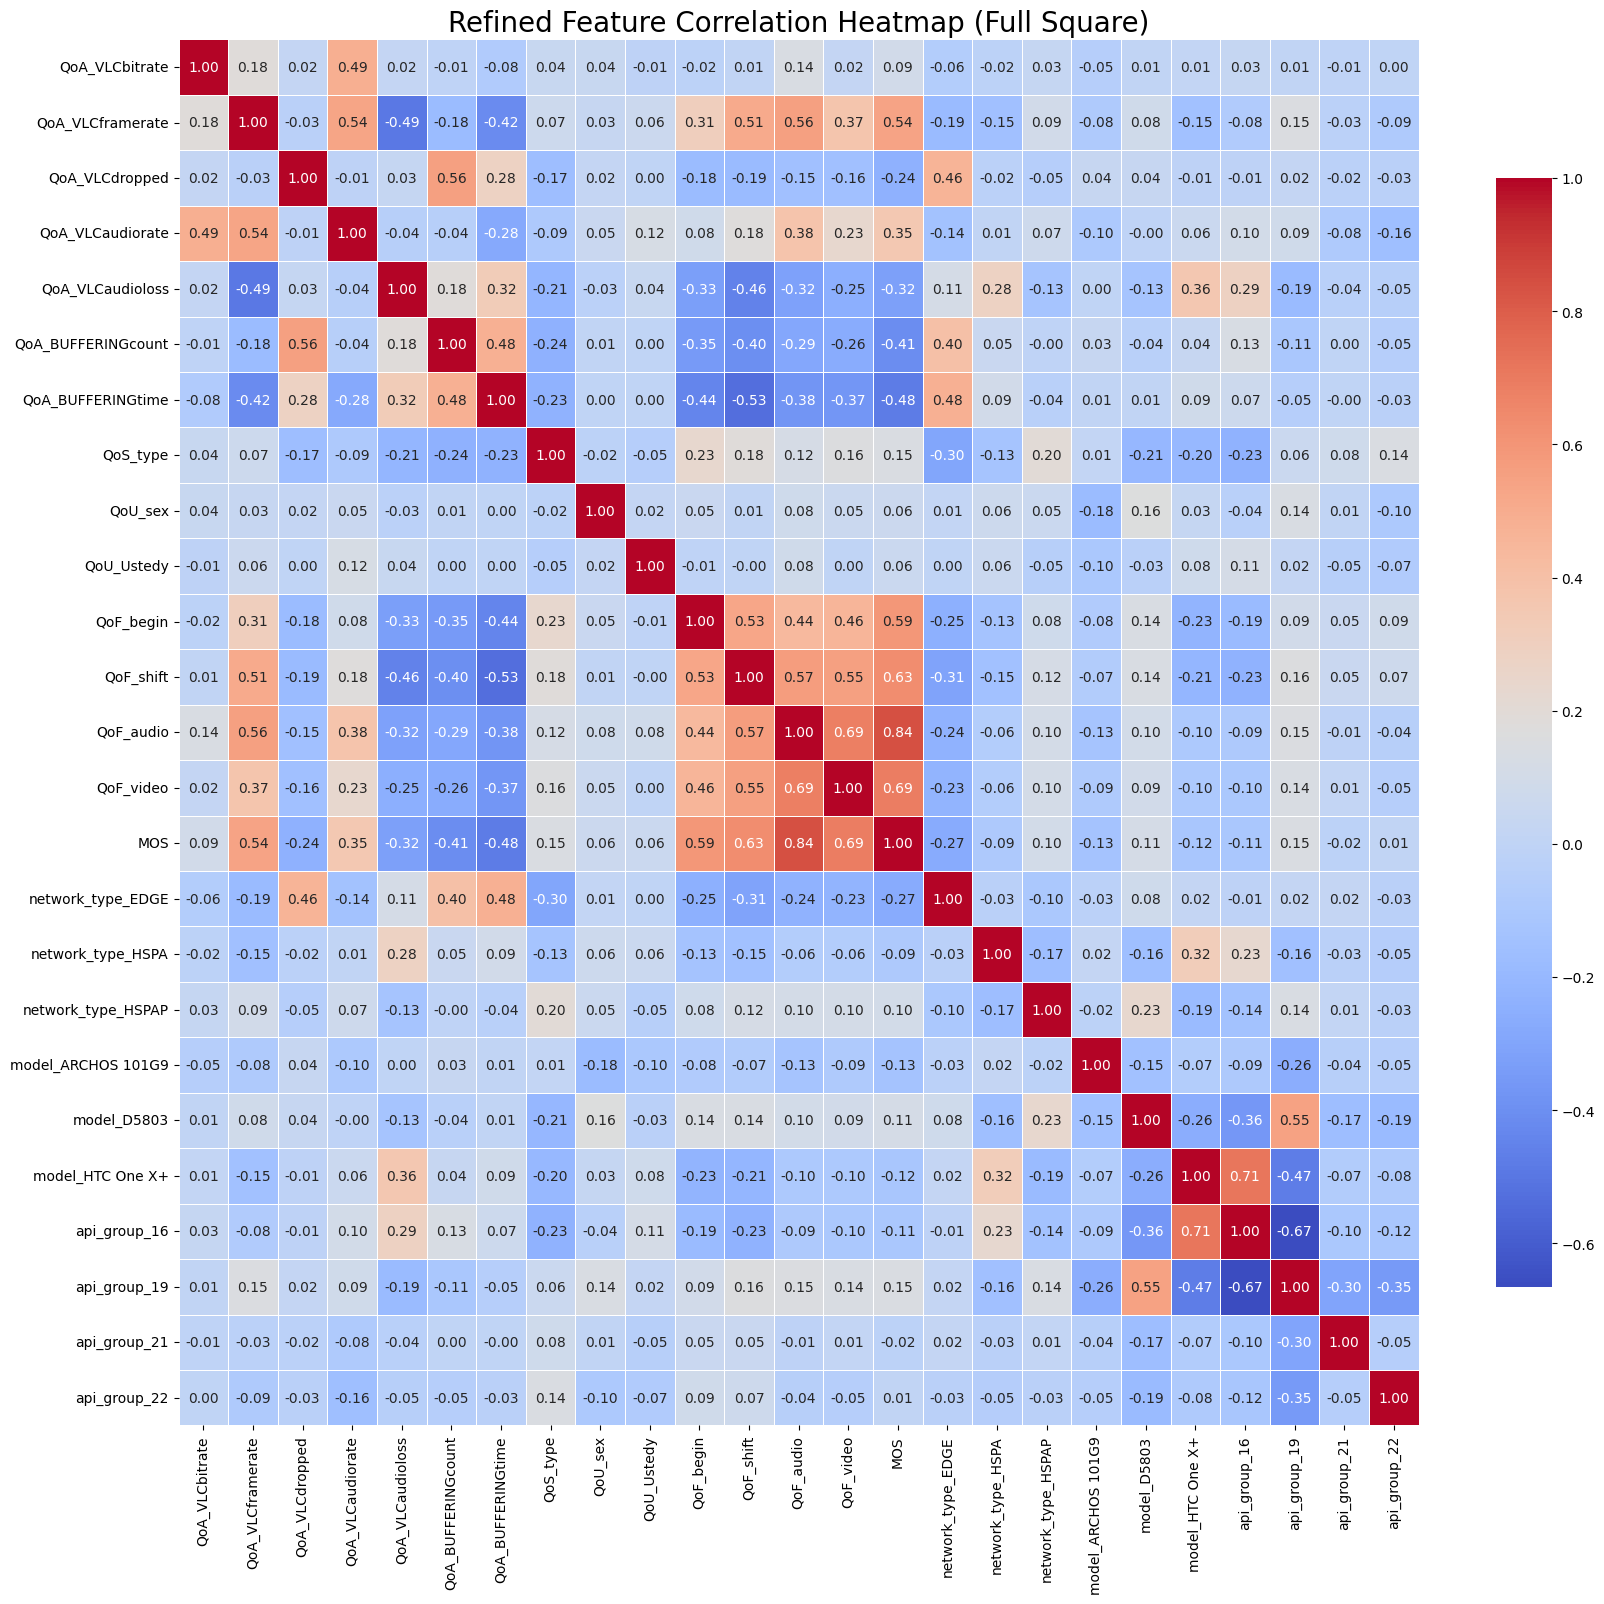

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13036\1812071980.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mos_correlations_refined.values, y=mos_correlations_refined.index, palette='viridis')


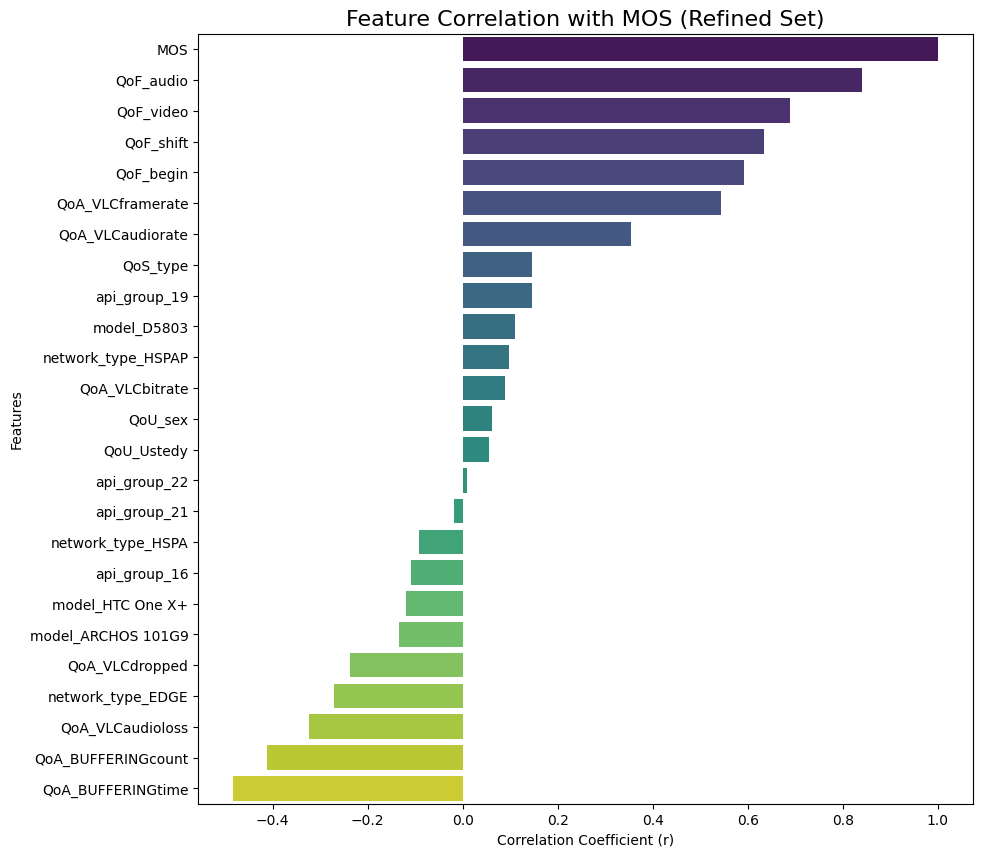

In [38]:
# 1. Recalculate the correlation matrix on the refined data
correlation_matrix_refined = df_refined.corr()

# 2. Setup the plot area for the Heatmap
# Setup the plot area
plt.figure(figsize=(20, 18)) 

# Draw the full square heatmap (by removing the 'mask' parameter)
sns.heatmap(
    correlation_matrix_refined,
    annot=True,              # Keep annotations for readability
    cmap='coolwarm',
    fmt=".2f",               # Format to 2 decimal places
    linewidths=.5,
    cbar_kws={'shrink': 0.8}
)

plt.title('Refined Feature Correlation Heatmap (Full Square)', fontsize=20)
plt.show()

# 5. Visual check: Re-run the MOS correlation bar chart for the refined data
mos_correlations_refined = correlation_matrix_refined['MOS'].sort_values(ascending=False)

plt.figure(figsize=(10, len(mos_correlations_refined) * 0.4))
sns.barplot(x=mos_correlations_refined.values, y=mos_correlations_refined.index, palette='viridis')
plt.title('Feature Correlation with MOS (Refined Set)', fontsize=16)
plt.xlabel('Correlation Coefficient (r)')
plt.ylabel('Features')
plt.show()

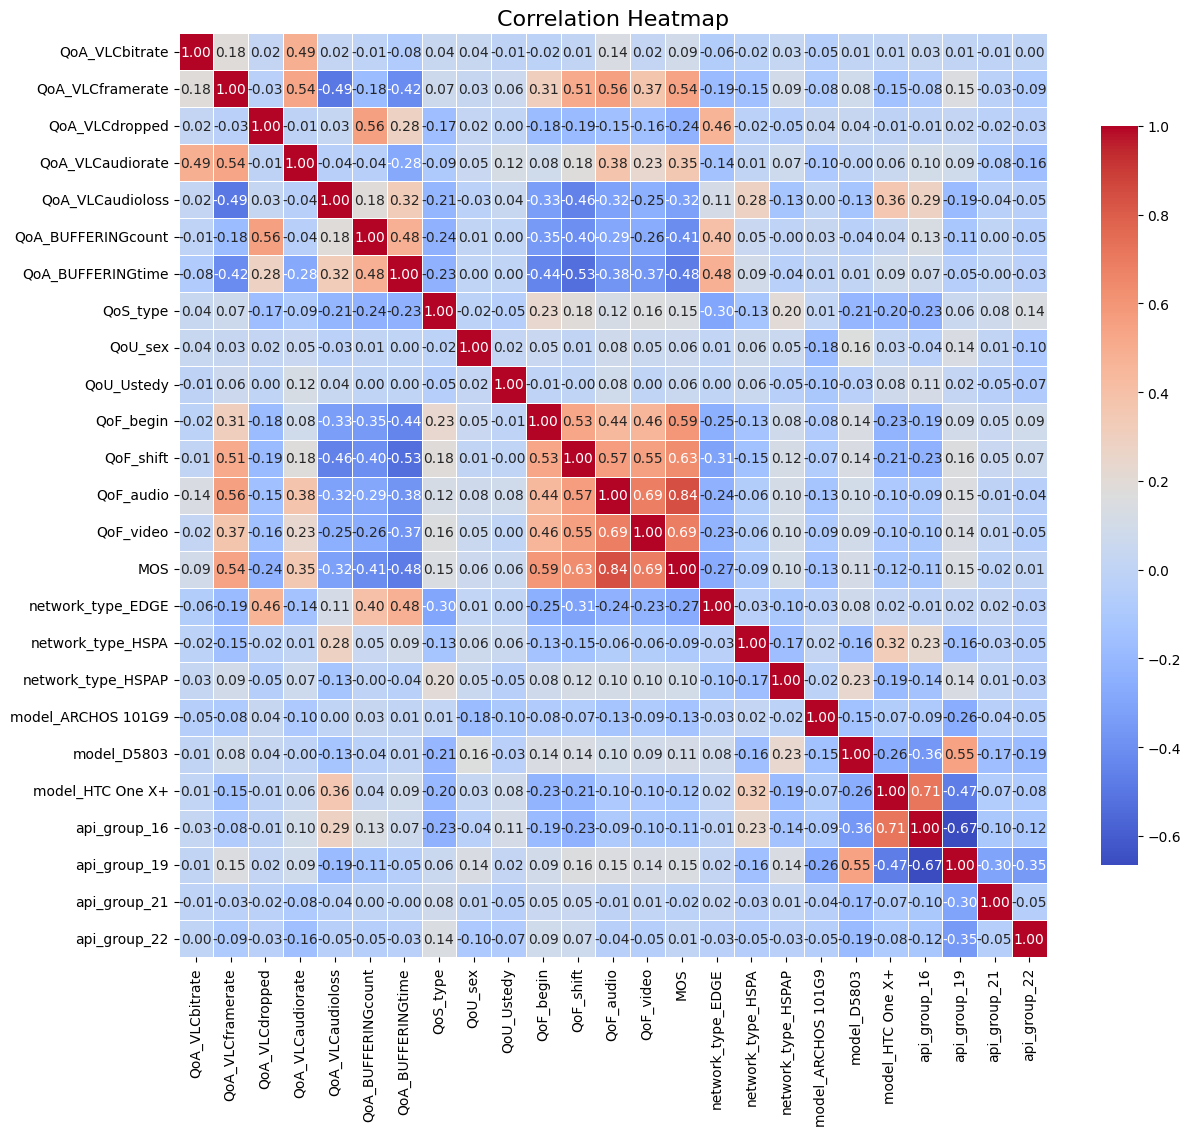

In [39]:
df_final = df_refined
correlation_matrix_final = df_final.corr()

plt.figure(figsize=(14, 12)) 
sns.heatmap(
    correlation_matrix_final,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'shrink': 0.8}
)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Why I Used StandardScaler in My Logistic Regression Model

I incorporated `StandardScaler` into my modeling pipeline for two critical reasons related to how my **Logistic Regression** model learns and optimizes.

---

### 1. To Achieve Faster and More Stable Convergence

I know that Logistic Regression uses an optimization algorithm (like the `lbfgs` solver I chose) to find the best feature coefficients. If my input features have wildly different scales (e.g., one feature goes from 0 to 100, and another is from 0 to 1), the optimization process becomes slow and inefficient. By using the scaler, **I standardize my features** to have a mean of 0 and a standard deviation of 1. This ensures all features are on a level playing field, which allows the optimizer to move more directly and **converge to a solution much faster**.

### 2. To Prevent Feature Dominance

If I hadn't scaled the data, a feature with a naturally large numerical range might exert undue influence on the model simply because of its size, not its predictive power. **I used `StandardScaler` to prevent this feature dominance.** It guarantees that the magnitude of the raw data values won't unfairly skew the weights the model assigns, ensuring that the final coefficients truly reflect each feature's **actual predictive importance** of the 'MOS' scores.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# --- 1. Define Features (X) and Target (y) ---
try:
    # Define features (X) by dropping the target variable
    X = df_final.drop('MOS', axis=1)
    
    # Define the target variable (y)
    y = df_final['MOS']
    
    print(f"Features (X) shape: {X.shape}")
    print(f"Target (y) shape: {y.shape}\n")

    # --- 2. Split Data into Training and Test Sets ---
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # --- 3. Scale the Features ---
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # --- 4. Initialize and Train the Logistic Regression Model ---
    # We use multi_class='ovr' (One-vs-Rest) to handle the 5 different MOS classes.
    model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000, random_state=42)
    
    print("Training the Logistic Regression model...")
    model.fit(X_train_scaled, y_train)
    print("Model training complete.\n")

    # --- 5. Make Predictions and Evaluate ---
    y_pred = model.predict(X_test_scaled)
    
    # Calculate and print the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"--- Model Evaluation ---")
    print(f"Overall Accuracy: {accuracy:.4f}\n")
    
    # Print the classification report for a detailed breakdown
    # This will show you the precision, recall, and f1-score for each MOS class
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

except NameError:
    print("Error: The DataFrame 'df_final' was not found.")
    print("Please make sure your preprocessed DataFrame is named 'df_final' and run this cell again.")

Features (X) shape: (1543, 24)
Target (y) shape: (1543,)

Training the Logistic Regression model...


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Model training complete.

--- Model Evaluation ---
Overall Accuracy: 0.7476

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.79      0.77        19
           2       0.62      0.21      0.31        24
           3       0.39      0.24      0.30        49
           4       0.76      0.92      0.83       157
           5       0.92      0.90      0.91        60

    accuracy                           0.75       309
   macro avg       0.69      0.61      0.62       309
weighted avg       0.72      0.75      0.72       309



Features (X) shape: (1543, 24)
Target (y) shape: (1543,)

Training set size after SMOTE: (3135, 24)
Training the Logistic Regression model...
Model training complete.

--- Model Evaluation ---
Overall Accuracy: 0.7896

Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.74      0.80        19
           2       0.59      0.67      0.63        24
           3       0.52      0.69      0.60        49
           4       0.90      0.78      0.84       157
           5       0.88      0.95      0.91        60

    accuracy                           0.79       309
   macro avg       0.75      0.77      0.76       309
weighted avg       0.81      0.79      0.80       309


--- Confusion Matrix (Numeric) ---
[[ 14   5   0   0   0]
 [  2  16   5   1   0]
 [  0   6  34   9   0]
 [  0   0  26 123   8]
 [  0   0   0   3  57]]


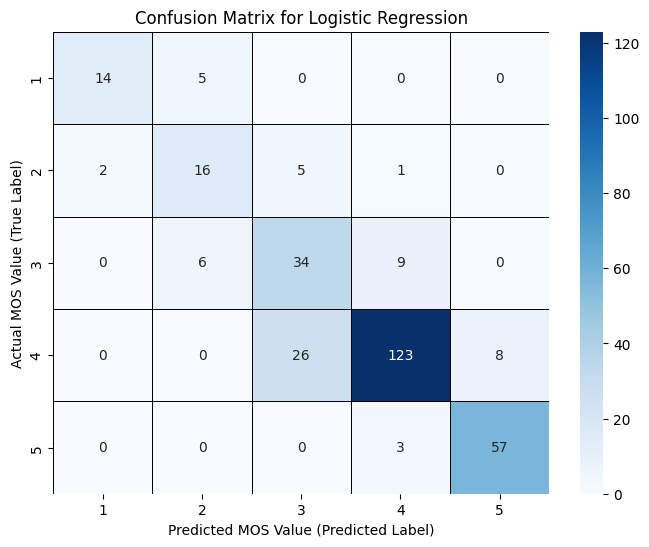

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
# --- 1. Define Features (X) and Target (y) ---
try:
    X = df_final.drop('MOS', axis=1)
    y = df_final['MOS']

    print(f"Features (X) shape: {X.shape}")
    print(f"Target (y) shape: {y.shape}\n")

    # --- 2. Split Data into Training and Test Sets ---
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y)

    # --- 3. Scale the Features ---
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # --- 4. Oversample only on the training set with SMOTE ---
    smote = SMOTE(random_state=42)
    X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

    print(f"Training set size after SMOTE: {X_train_bal.shape}")

    # --- 5. Initialize and Train the Logistic Regression Model ---
    model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

    print("Training the Logistic Regression model...")
    model.fit(X_train_bal, y_train_bal)
    print("Model training complete.\n")

    # --- 6. Make Predictions and Evaluate ---
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"--- Model Evaluation ---")
    print(f"Overall Accuracy: {accuracy:.4f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # --- 7. Calculate and Display the Confusion Matrix (Text) ---
    cm = confusion_matrix(y_test, y_pred)
    print("\n--- Confusion Matrix (Numeric) ---")
    print(cm)

    # --- 8. Drawing of the Confusion Matrix (Visualization) ---
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,          # Annotate the cells with the numeric values
        fmt='d',             # Format for the annotations (integer)
        cmap='Blues',        # Color map
        cbar=True,           # Show color bar
        linewidths=.5,       # Add lines between cells
        linecolor='black',
        # Assuming MOS is an integer, these labels represent the classes
        xticklabels=sorted(y.unique()),
        yticklabels=sorted(y.unique())
    )
    plt.title('Confusion Matrix for Logistic Regression')
    plt.ylabel('Actual MOS Value (True Label)')
    plt.xlabel('Predicted MOS Value (Predicted Label)')
    plt.show() # Display the plot

except NameError:
    print("Error: The DataFrame 'df_final' was not found.")
    print("Please make sure your preprocessed DataFrame is named 'df_final' and run this cell again.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Define Features (X) and Target (y)
X = df_final.drop('MOS', axis=1)
y = df_final['MOS']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}\n")

# 2. Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Scale Features (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Initialize Random Forest Classifier with class_weight='balanced'
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

print("Training the Random Forest model...")
model.fit(X_train_scaled, y_train)
print("Model training complete.\n")

# 5. Make Predictions and Evaluate
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"--- Model Evaluation ---")
print(f"Overall Accuracy: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Features (X) shape: (1543, 24)
Target (y) shape: (1543,)

Training the Random Forest model...
Model training complete.

--- Model Evaluation ---
Overall Accuracy: 0.8091

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.89      0.92        19
           2       0.64      0.58      0.61        24
           3       0.52      0.51      0.52        49
           4       0.85      0.89      0.87       157
           5       0.96      0.90      0.93        60

    accuracy                           0.81       309
   macro avg       0.78      0.76      0.77       309
weighted avg       0.81      0.81      0.81       309



Features (X) shape: (1543, 24)
Target (y) shape: (1543,)

Training set size after SMOTE: (3135, 24)
Training the Random Forest model...
Model training complete.

--- Model Evaluation ---
Overall Accuracy: 0.8317

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.89      0.92        19
           2       0.67      0.67      0.67        24
           3       0.59      0.65      0.62        49
           4       0.88      0.88      0.88       157
           5       0.95      0.90      0.92        60

    accuracy                           0.83       309
   macro avg       0.81      0.80      0.80       309
weighted avg       0.84      0.83      0.83       309


--- Confusion Matrix (Numeric) ---
Rows: Actual MOS Value (True Label)
Columns: Predicted MOS Value (Predicted Label)
[[ 17   2   0   0   0]
 [  1  16   7   0   0]
 [  0   3  32  14   0]
 [  0   2  14 138   3]
 [  0   1   1   4  54]]


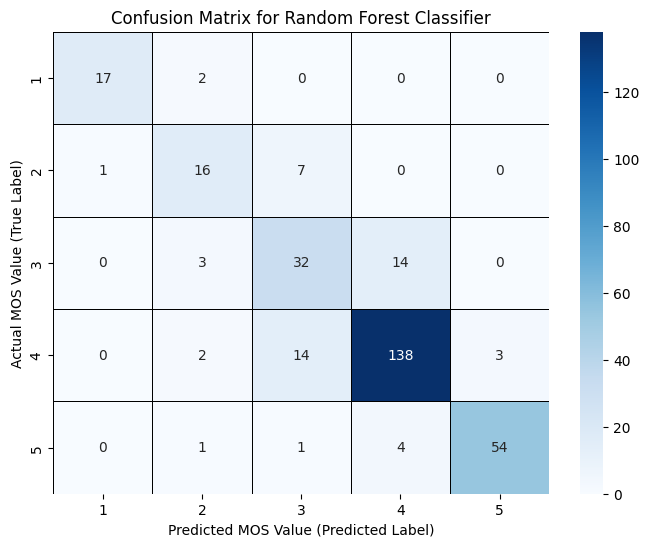

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
# --- 1. Define Features (X) and Target (y) ---
try:

    X = df_final.drop('MOS', axis=1)
    y = df_final['MOS']

    print(f"Features (X) shape: {X.shape}")
    print(f"Target (y) shape: {y.shape}\n")

    # --- 2. Split Data into Training and Test Sets ---
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y)

    # --- 3. Scale Features (optional but can help) ---
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # --- 4. Apply SMOTE oversampling on training set only ---
    smote = SMOTE(random_state=42)
    X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

    print(f"Training set size after SMOTE: {X_train_bal.shape}")

    # --- 5. Initialize Random Forest Classifier with class_weight='balanced' ---
    model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

    print("Training the Random Forest model...")
    model.fit(X_train_bal, y_train_bal)
    print("Model training complete.\n")

    # --- 6. Make Predictions and Evaluate ---
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"--- Model Evaluation ---")
    print(f"Overall Accuracy: {accuracy:.4f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # --- 7. Calculate the Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    print("\n--- Confusion Matrix (Numeric) ---")
    print("Rows: Actual MOS Value (True Label)")
    print("Columns: Predicted MOS Value (Predicted Label)")
    print(cm)

    # --- 8. Drawing of the Confusion Matrix (Visualization) ---
    plt.figure(figsize=(8, 6)) # Set the figure size for better readability
    sns.heatmap(
        cm,
        annot=True,          # Annotate the cells with the numeric values
        fmt='d',             # Format for the annotations (integer)
        cmap='Blues',        # Color map (e.g., 'Blues', 'viridis', 'YlGnBu')
        cbar=True,           # Show color bar
        linewidths=.5,       # Add lines between cells
        linecolor='black',
        # Set tick labels. Assuming MOS values are integers, you can get unique sorted values.
        xticklabels=sorted(y.unique()),
        yticklabels=sorted(y.unique())
    )
    plt.title('Confusion Matrix for Random Forest Classifier')
    plt.ylabel('Actual MOS Value (True Label)')
    plt.xlabel('Predicted MOS Value (Predicted Label)')
    plt.show() # Display the plot

except NameError:
    print("Error: The DataFrame 'df_final' was not found.")
    print("Please make sure your preprocessed DataFrame is named 'df_final' and run this cell again.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")